In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import os
import glob
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
vac_manufact= pd.read_csv("E:/SEM 5/E1 CS312 DA/DA PROJECT/country_vaccinations_by_manufacturer.csv")

In [5]:
vac_manufact.index

RangeIndex(start=0, stop=9895, step=1)

In [6]:
# information about dataset 
vac_manufact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   location            9895 non-null   object
 1   date                9895 non-null   object
 2   vaccine             9895 non-null   object
 3   total_vaccinations  9895 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 309.3+ KB


In [7]:
vac_manufact.shape

(9895, 4)

In [8]:
# check miss value
vac_manufact.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [9]:
vac_manufact.head(5)

,location,date,vaccine,total_vaccinations
0,Austria,08-01-2021,Johnson&Johnson,0
1,Austria,08-01-2021,Moderna,0
2,Austria,08-01-2021,Oxford/AstraZeneca,0
3,Austria,08-01-2021,Pfizer/BioNTech,30988
4,Austria,15-01-2021,Johnson&Johnson,0


In [10]:
vac_manufact['date'] = pd.to_datetime(vac_manufact['date'], format = '%d-%m-%Y')
vac_manufact

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30988
4,Austria,2021-01-15,Johnson&Johnson,0
...,...,...,...,...
9890,Uruguay,2021-07-25,Pfizer/BioNTech,1399572
9891,Uruguay,2021-07-25,Sinovac,3183073
9892,Uruguay,2021-07-26,Oxford/AstraZeneca,81183
9893,Uruguay,2021-07-26,Pfizer/BioNTech,1421884


In [11]:
vac_manufact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9895 entries, 0 to 9894
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   location            9895 non-null   object        
 1   date                9895 non-null   datetime64[ns]
 2   vaccine             9895 non-null   object        
 3   total_vaccinations  9895 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 309.3+ KB


In [16]:
Vacc = vac_manufact.groupby('vaccine').sum().sort_values(by=['total_vaccinations'], ascending=False)
Vacc['total_vaccinations'] = Vacc['total_vaccinations'].div(100).round(2)
Vacc

,total_vaccinations
vaccine,
Pfizer/BioNTech,3.801997e+08
Moderna,1.786214e+08
Oxford/AstraZeneca,3.141898e+07
Sinovac,2.197000e+07
Johnson&Johnson,1.475870e+07
Sinopharm/Beijing,3.041437e+05
Sputnik V,2.594869e+05
CanSino,1.794493e+05


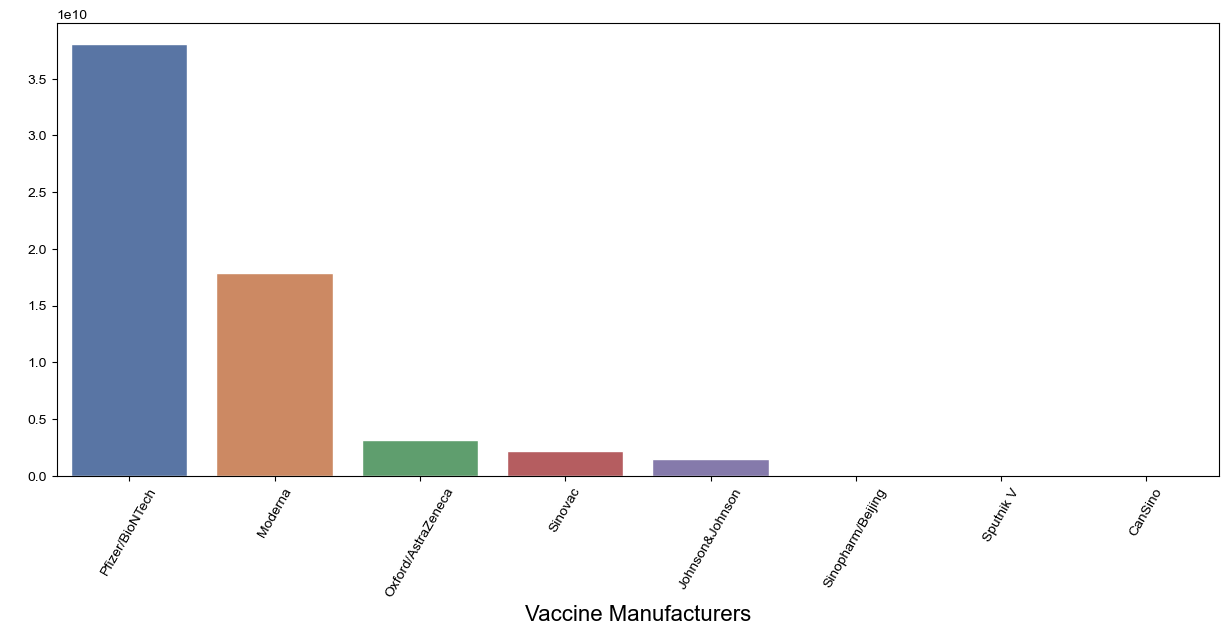

In [17]:
Vacc = vac_manufact.groupby('vaccine').sum().sort_values(by=['total_vaccinations'], ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=100, figsize = (15,6))
sns.set()
sns.barplot(x=Vacc.index, y=Vacc['total_vaccinations'], ax=ax)
ax.set_xlabel("Vaccine Manufacturers", fontsize = 16)
ax.set_ylabel(" ")
for label in ax.xaxis.get_ticklabels():
            label.set_rotation(60)

plt.show()